# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score

# choose the appropriate code

#from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve


In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


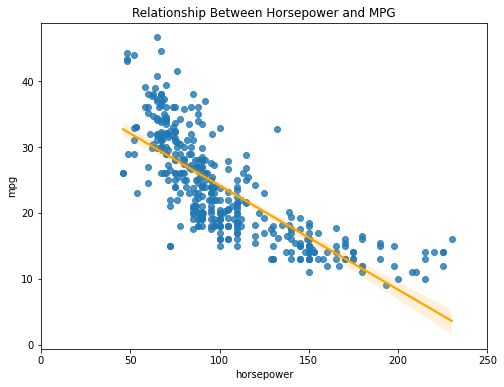

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
# call_on_students(1)

#### Answer: 

- The chart shows the amount of RSS or error (difference between our predictions and acutal values) on the y-axis and the slope of the model on the x-axis. It tells us what the optimal coefficient value should be at -0.158 in order to minimize error (RSS).


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
#call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
# call_on_students(1)

#### Answer: 

- Step size is how large the intervals are as we move torwards the minima. Too large a step size and we will miss the minima while too small a step size will take forever to arrive at the minima.

REVIEW ANSWER:
- Step size captures the **amount to change the coefficient** as it tries to minimize the error term. 
- Learning rate determines **how large those steps (determined at the start)** (LR * Slope = Step Size).

## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
# call_on_students(1)

#### Answer: 

- Used for a categorical/discrete target. 
- Predicted (log-odds rtranslated into probabilities) probabilities (predict_proba function) and predicted classes (predict function)
- Linear regression predicts a continuous target and is not bound between 0 and 1. 
- Parametric

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
# call_on_students(1)

#### Answer: 

- 1) **Simple to interpret**, fits quickly, not prone to overfit, automatically implements Regularization
- 2) Another model might be more useful **if the target is imbalanced**, or if there are interaction terms in the data


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
# call_on_students(1)

In [14]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop('target', axis=1)
y= mpg_class['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
# Scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- About 74% of the data is labeled as class 0 and about 26% of the data is labeled class 1 which means we have a substantial class imbalance


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- A model-less baseline would predict class 1 correctly 26% of the time if it always predicted class 1.

OR 

- if we predicted only our majority class (class 0) we would have an accuracy fof 74%


#### Part 3: How accurate would that baseline be on test data?


In [18]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- It would be about the same in terms of accuracy at 25%.


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [19]:
# call_on_students(1)

#### Answer:

- Problem: Target is imblanced
- Strategy: We could better balance the classes using oversmapling, synthetic oversampling (SMOTE), or setting `class_weight`
- ***Note that undersampling doesn't make sense here since our dataset is so small***


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [20]:
# call_on_students(1)

In [21]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

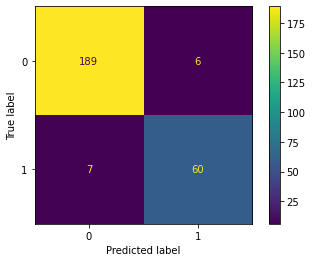

In [22]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_train_scaled, y_train); #Depreciated version

#OR

# ConfusionMatrixDisplay.from_estimator(logreg, X_train_scaled, y_train); #New version

#OR

# from sklearn.metrics import confusion_matrix

# y_hat_train =  logreg.predict(X_train_scaled)

# cm = confusion_matrix(y_train, y_hat_train)

# ConfusionMatrixDisplay(cm).plot

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [23]:
# call_on_students(1)

In [24]:
#Get y predictions on test
y_hat_test = logreg.predict(X_test_scaled)
y_hat_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
# Accuracy- True Positives and True Negatives over all Predictions ((TP + TN)/(TP+TN+FP+FN))
accuracy_score(y_test, y_hat_test)

0.9230769230769231

In [26]:
# Precision- True Positives over Total Predicted Positives (TP/(TP + FP))
precision_score(y_test, y_hat_test)

0.9583333333333334

In [27]:
# Recall- True Positives over Actual True Positives (TP/(TP + FN))
recall_score(y_test, y_hat_test)

0.71875

In [28]:
# F1-Score 2*((Precision*Recall)/(Precision+Recall))
f1_score(y_test, y_hat_test)

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [29]:
# call_on_students(1)

In [30]:
#Probability of our test to select class 1 (hence index [:,1]). [:,0] would show probabilities for class 0
test_probas = logreg.predict_proba(X_test_scaled)[:,1]

In [31]:
# Calculate roc-auc
roc_auc_score(y_test, test_probas)

0.9811862244897959

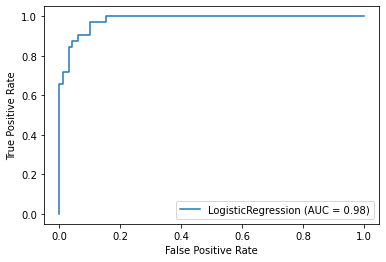

In [32]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

# OR

# RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [33]:
# call_on_students(1)

#### Answer:

- Our model seems to be doing really well with an AUC of 0.98
- More False Negatives than False Positives (better precision than recall)


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [34]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

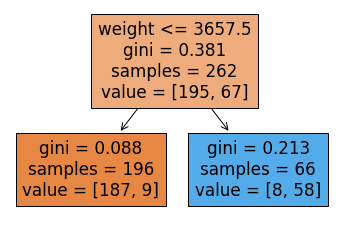

In [35]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

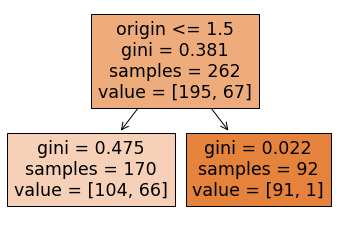

In [36]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [37]:
# call_on_students(1)

#### Answer:

- Version 1: Weight as it produces more pure splits. It has a lower total Gini impurity (0.088 + 0.213) is smaller than (0.475 + 0.022).

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [38]:
# call_on_students(1)

In [39]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

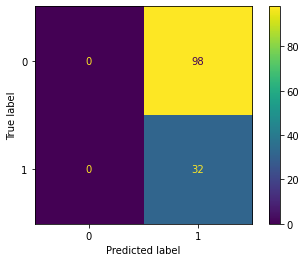

In [40]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test);

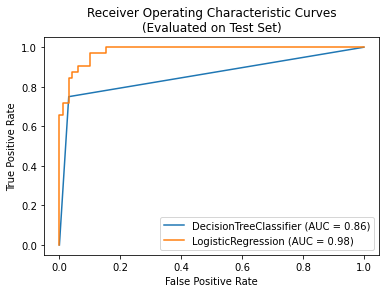

In [41]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()

plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)
 
# or 
    
#RocCurveDisplay.from_estimator(dt, X_test_scaled, y_test, ax=ax)
#RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test, ax=ax)


plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [42]:
# call_on_students(1)

#### Answer:

- The Logistic Regression model is better according to the ROC-AUC score as it keeps the False Positive Rate low while having a high True Positive Rate.
